# Project 1 Group 3

Melissa Mayer,
Brian Nagle,
Buster Boles,
Justin Lawrence.

# NFL games: Which factors influence the outcome?

Introduction

Our group has set out to discover what factors may influence the outcome of the NFL game. We examined if a correlation exists between home-field advantage and the win/loss record and total scores of NFL games since 1966. We also examined variables such as weather, surface type, and stadium variations to determine which factors had the greatest impact.

Questions to be examined

Q1: Does the home team win more than lose in all games?

Q2: Does the home team win more than lose in playoff games?

Q3: How does weather affect the number of home team wins?

Q4: Does the home team win or lose more often on a grass or turf surface?

Q5: Does the home team win or lose more often in an outdoor or indoor stadium?

Q6: How is the total score (both teams) impacted by windspeed 

Q7: How is the total score (both teams) impacted by temperature?

In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")


# Data Preparation

Raw dataset was downloaded from ​

[NFL scores and betting data (kaggle.com)​](https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data)
​

Two csv files were merged to give a single dataframe containing​

    Scores from every NFL game since 1966 season​
    Stadium type (indoor or outdoor)​
    Stadium surface (grass or non-grass)​
    General weather conditions (warm, moderate or cold)​
    Specific weather conditions for each game (wind speed, temperature, humidity)​

Data was cleaned to remove nulls and drop coulmns not being used in the analysis.
​
Calculations were carried out to give the following additional information​

    ​Numbers of wins or losses and ties​
    Total score in each game​

​

In [2]:
#import scores and stadiums csv files as dataframe
scores_df=pd.read_csv('../project_one/Resources/spreadspoke_scores.csv')
stadium_df=pd.read_csv('../project_one/Resources/nfl_stadiums.csv', encoding="utf-8")

In [3]:
# Merge scores and stadiums datframes

# The two dataframes have different columns names containg stadium names. Rename one so they match for merging
scores_df.rename(columns = {'stadium':'stadium_name'}, inplace = True)

# Merge two dataframes left on stadium_name
data_df=pd.merge(scores_df, stadium_df, how='left', on='stadium_name' )


In [4]:
# Clean data

# Remove columns not being used for this project

# Define columns to be dropped
drop_list=['stadium_azimuthangle', 
           'stadium_weather_station_name',
           'stadium_weather_station',
           'stadium_weather_station_zipcode',
           'stadium_address',
           'stadium_close',
           'stadium_open',
           'over_under_line',
           'spread_favorite',
           'team_favorite_id',
            ]

# Drop the selected columns
data_df=data_df.drop(drop_list, axis='columns')

# Drop neutral site games, keep only home/away 
data_df=data_df.loc[data_df['stadium_neutral']==False]

# Drops NaNs in home and away scores
data_df.dropna(subset=['score_home'], inplace=True)
data_df.dropna(subset=['score_away'], inplace=True)

# Add a empty column home_result
data_df["home_result"]=''

# Move new column over to be beside the home and away scores
data_df=data_df.iloc[:,[0,1,2,3,4,5,6,7,21,8,9,10,11,12,13,14,15,16,17,18,19,20]]

# Fill column home_result to show if home team won (W), lost (L) or tied (T) 
# based on relationship between home score and away score

home=data_df['score_home']
away=data_df['score_away']

data_df['home_result']=np.where(home > away, 'Win', 'Loss or Tie')

# Adding column with calculated total score (home+away)
data_df['total_score']=(data_df['score_home']+data_df['score_away'])



# Q1: Does the home team win more than lose in all games?

To answer this question, we calculated the win and loss percentage for the home teams for all regular and playoff games in the dataset. The results were ploted on a pie chart. Any games held at neutral sites were dropped before this calculation. This included Superbowls and games in Mexico or Europe.

The home team wins 57% of the games played since 1966. 

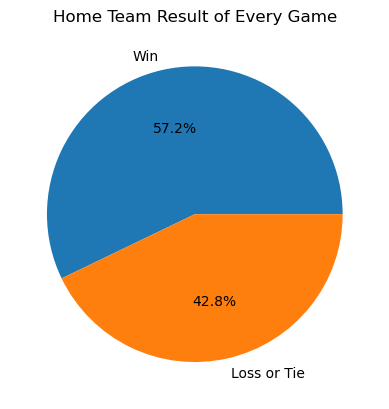

In [5]:
# Pie chart of total home wins and total losses/ties for entire dataset

# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(data_df['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

# Plot Pie Chart
plt.pie(counts, labels=result, autopct='%1.1f%%')
plt.title("Home Team Result of Every Game")
plt.show()

# Q2: Does the home team win more than lose in playoff games?

To answer this question, we calculated the win and loss percentage for the home teams for all playoff games in the dataset. The results were ploted on a bar chart. We dropped regular season results from the dataset. Any games held at neutral sites were also dropped before this calculation.

The home team wins more games playoffs. We comapre this to the regular season (noting that there is far more regular season games than playoff). From the bar graphs it appears that the home team wins more often in playoff games compared to regular season games.

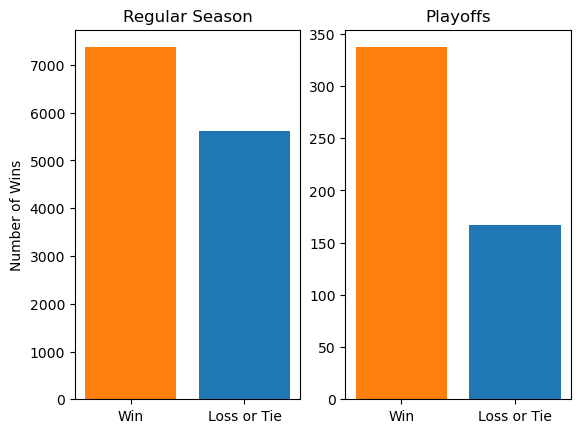

In [6]:
only_playoff_df = data_df.groupby("home_result")["schedule_playoff"].value_counts()

results = [7368, 5610]

x_axis = np.arange(len(results))
plt.subplot(1,2,1)
plt.bar(x_axis, results, color=['tab:orange', 'tab:blue'])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Win", "Loss or Tie"])
plt.title("Regular Season")
plt.ylabel("Number of Wins")


results = [337, 167]
x_axis = np.arange(len(results))

plt.subplot(1,2,2)

plt.bar(x_axis, results, color=['tab:orange', 'tab:blue'])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Win", "Loss or Tie"])
plt.title("Playoffs")

plt.show()



# Q3: How does weather affect the number of home team wins?

In the dataset, each stadium is classified as "warm", "moderate" and "cold". According to the documentation with the dataset, this classification is based on the average temperatures at a stadium and not the temperature of a particular game.

To see if weather influences the number of home team wins, we calculated the number of home team wins when the data has been filtered by "warm", "moderate" and "cold" respectively. These results were plotted on pie charts and subplotted side-by-side for comparison.

In moderate and cold temperatures, the home team has a higher winning percentage (60.2% and 58.2%) than in warmer weather (54.9%). 

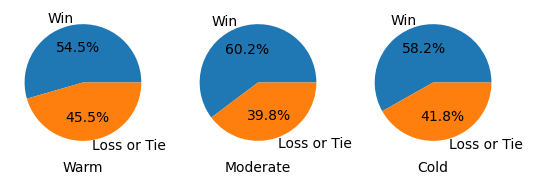

In [7]:
# Pie chart of total home wins and total losses/ties for different stadium weather types

# Pie chart of total home wins and total losses/ties for "warm weather" stadiums
# Filter entire dataset for warm weather stadiums
warm_data=data_df.loc[data_df['stadium_weather_type']=='warm']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(warm_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.subplot(1, 3, 1)
plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.xlabel("Warm")


# Pie chart of total home wins and total losses/ties for "moderate weather" stadiums
# Filter entire dataset for warm weather stadiums
moderate_data=data_df.loc[data_df['stadium_weather_type']=='moderate']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(moderate_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.subplot(1, 3, 2)
plt.pie(counts, labels=result, autopct='%1.1f%%')


plt.xlabel("Moderate")

# Pie chart of total home wins and total losses/ties for "cold weather" stadiums
# Filter entire dataset for warm weather stadiums
cold_data=data_df.loc[data_df['stadium_weather_type']=='cold']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(cold_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.subplot(1, 3, 3)
plt.pie(counts, labels=result, autopct='%1.1f%%')
plt.xlabel("Cold")

plt.show()

# Q4: Does the home team win or lose more often on a grass or turf surface?

In the dataset, each stadium is classified as having a grass or some type of artificial turf surface

To see if surface type influences the number of home team wins, we calculated the number of home team wins when the data has been filtered by "grass" and not grass surfaces respectively. These results were plotted on pie charts and subplotted side-by-side for comparison.

Teams who play on grass have a slightly higher winning percentage (57.9%) than those teams who play on turf (55.9%). 

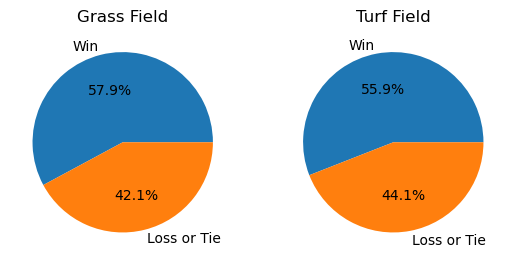

In [8]:
grass_data=data_df.loc[data_df['stadium_surface']!='Grass']
summary=pd.DataFrame(grass_data['home_result'].value_counts())
result=summary.index
counts=summary['count']
result=summary.index
counts=summary['count']

plt.subplot(1,2,1)
plt.pie(counts, labels=result, autopct='%1.1f%%')
plt.title("Grass Field")


grass_data=data_df.loc[data_df['stadium_surface']=='Grass']
summary=pd.DataFrame(grass_data['home_result'].value_counts())
result=summary.index
counts=summary['count']

plt.subplot(1,2,2)
plt.pie(counts, labels=result, autopct='%1.1f%%')
plt.title("Turf Field")
plt.show()


# Q5: Does the home team win or lose more often in an outdoor or indoor stadium?

In the dataset, each stadium is classified as being indoor, outdoor or retractable-roofed

To see if stadium type influences the number of home team wins, we calculated the number of home team wins when the data has been filtered by "indoor" and "outdoor" respectively. Results on retractable-roofed stadium were dropped as we had no data on if the roof was opened or closed for any particular game.

These results were plotted on pie charts and subplotted side-by-side for comparison.

Home teams who play in outdoor stadiums have a slightly higher winning percentage (57.9%) than those teams who play in a indoor stadium (54.7%).

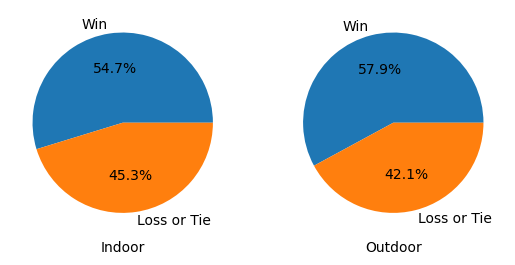

In [9]:
# Pie chart of total home wins and total losses/ties for indoor and outdoor stadiums

# Filter entire dataset for indoor stadiums
indoor_data=data_df.loc[data_df['stadium_type']=='indoor']

# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(indoor_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.subplot(1, 2, 1)
plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.xlabel("Indoor")

# Pie chart of total home wins and total losses/ties for outdoor stadiums

# Filter entire dataset for outdoor stadiums
outdoor_data=data_df.loc[data_df['stadium_type']=='outdoor']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(outdoor_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.subplot(1, 2, 2)
plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.xlabel("Outdoor")

plt.show()

# Q6: How is the total score (both teams) impacted by windspeed 

<function matplotlib.pyplot.show(close=None, block=None)>

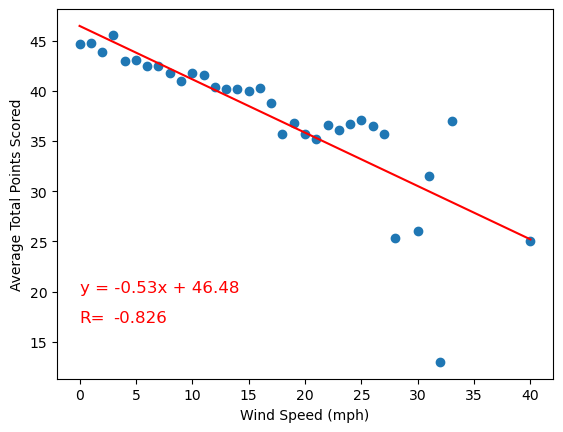

In [10]:
# Wind Speed vs Total Score

wind_data=data_df.dropna(subset=['weather_wind_mph'])
wind_data['total_score']=(wind_data['score_home']+wind_data['score_away'])
wind_data=pd.DataFrame(wind_data.groupby(['weather_wind_mph'])['total_score'].mean())
wind_data.head()

x_axis=wind_data.index
y_axis=wind_data['total_score']

plt.scatter(x_axis, y_axis)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Average Total Points Scored')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"red")
plt.annotate(line_eq,(0, 20), fontsize=12,color="red")
plt.annotate(round(rvalue,3),(3, 17), fontsize=12,color="red")
plt.text(0,17, 'R=',fontsize=12,color="red")

plt.show

# Q7: How is the total score (both teams) impacted by temperature?

<function matplotlib.pyplot.show(close=None, block=None)>

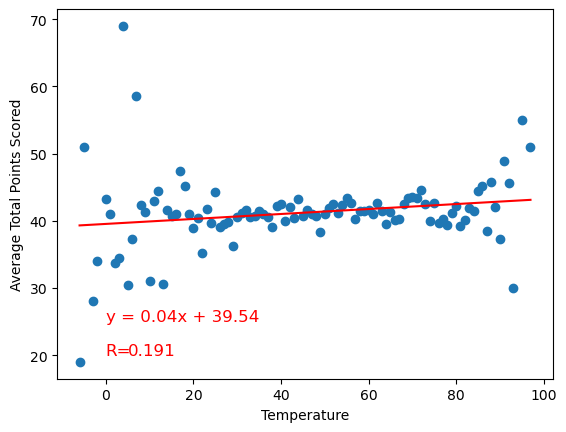

In [11]:
# Temp vs Total Score

temp_data=data_df.dropna(subset=['weather_temperature'])
temp_data['total_score']=(temp_data['score_home']+temp_data['score_away'])
temp_data=pd.DataFrame(temp_data.groupby(['weather_temperature'])['total_score'].mean())
temp_data.head()

x_axis=temp_data.index
y_axis=temp_data['total_score']

plt.scatter(x_axis, y_axis)
plt.xlabel('Temperature')
plt.ylabel('Average Total Points Scored')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"red")
plt.annotate(line_eq,(0, 25), fontsize=12,color="red")
plt.annotate(round(rvalue,3),(5, 20), fontsize=12,color="red")
plt.text(0,20, 'R=',fontsize=12,color="red")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

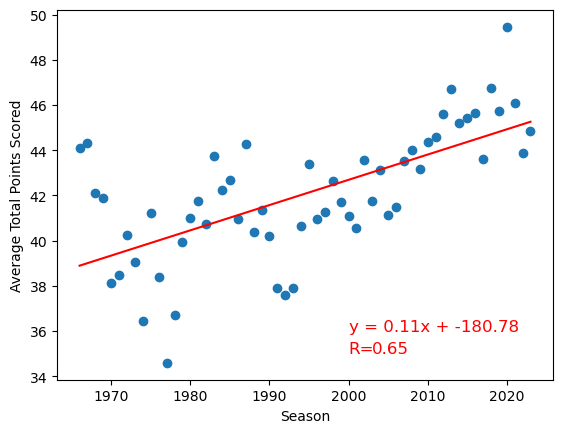

In [12]:
# Mean total scores vs season

season_scores=data_df
season_scores['total_score']=(season_scores['score_home']+season_scores['score_away'])
season_scores=pd.DataFrame(season_scores.groupby(['schedule_season'])['total_score'].mean())


x_axis=season_scores.index
y_axis=season_scores['total_score']

plt.scatter(x_axis, y_axis)
plt.xlabel('Season')
plt.ylabel('Average Total Points Scored')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"red")
plt.annotate(line_eq,(2000, 36), fontsize=12,color="red")
plt.annotate(round(rvalue,3),(2003, 35), fontsize=12,color="red")
plt.text(2000,35, 'R=',fontsize=12,color="red")

plt.show

# Conclusion

The home team  wins 57% of the games played since 1966. 

The home team has a higher winning percentage in the regular season and in the playoffs. 

In moderate and cold temperatures, the home team has a higher winning percentage (60.2% and 58.2%) than in warmer weather (54.9%). 

Teams who play on grass have a higher winning percentage (57.9%) than those teams who play on turf (55.9%).  

Home teams who play in outdoor stadiums have a higher winning percentage (57.9%) than those teams who play in a indoor stadium (54.7%).

There is a negative overall correlation (r value = -0.826) between total average score and windspeed.

There is a minimal correlation between temperature and average points scored (r value = 0.191). 

If we were tasked with choosing a site for the Superbowl that reuslt ina  high scoireing game, we would recommend a outdoor location with moderate weather and low wind speeds.